## Importing Libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## The Noise Cancellation Filter

<h5>
   filt is a function which takes an image and w and m which are the windows that the filter would uses to improve the image.(it simply searches the image and replace each pixel with the mean value thet it supposed to.)

<br>getmean is also a function which selects the mean of image within the window of size m that has the lowest variance.(by storeing the means and variances and selecting the mean with the lowest variance.)

In [6]:
def filt(w,m,img): 
    img = cv2.copyMakeBorder(img, w//2, w//2, w//2, w//2, cv2.BORDER_REFLECT)
    out = np.zeros(img.shape)
    for i in range(w//2,img.shape[0]-w//2+1):
        for j in range(w//2,img.shape[1]-w//2+1):
            out[i,j] = getmean(img[i-w//2:i+w//2+1,j-w//2:j+w//2+1],m)
    return out[w//2:img.shape[0]-w//2,w//2:img.shape[1]-w//2]



def getmean(window,m):#returns the mean of lowest var in m*m windows
    mean = np.zeros((window.shape[0]-m+1)*(window.shape[1]-m+1))
    var = np.zeros((window.shape[0]-m+1)*(window.shape[1]-m+1))
    for i in range(window.shape[0]-m+1):
        for j in range(window.shape[1]-m+1):
            temp = window[i:i+m,j:j+m]
            mean[i*(window.shape[1]-m+1)+j] = np.mean(temp)
            var[i*(window.shape[1]-m+1)+j] = np.mean(temp**2)-np.mean(temp)**2
    k = np.argmin(var) #the index of lowest variance
    return mean[k]

#### filtering with w = 5, m = 3

In [7]:
w = 5
m = 3
p1 = cv2.imread('P1.png',0)
p1_noisy = cv2.imread('p1_noisy.png',0)
res_p1 = filt(w,m,p1)
res_p1_noisy = filt(w,m,p1_noisy)

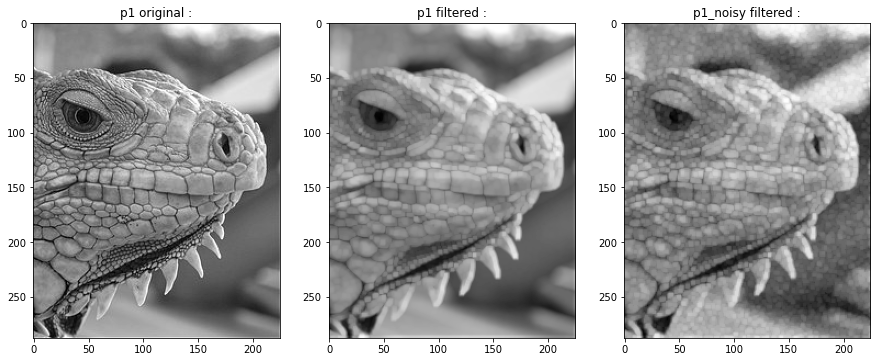

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(p1,cmap='gray');
plt.title('p1 original :')

plt.subplot(1,3,2)
plt.imshow(res_p1,cmap='gray');
plt.title('p1 filtered :')

plt.subplot(1,3,3)
plt.imshow(res_p1_noisy,cmap='gray');
plt.title('p1_noisy filtered :');
#print(p1.shape,res_p1.shape,p1_noisy.shape,res_p1_noisy.shape)

#### the filter doesn't effect the original image that much and nearly denoised the image completely

### The normal mean filter

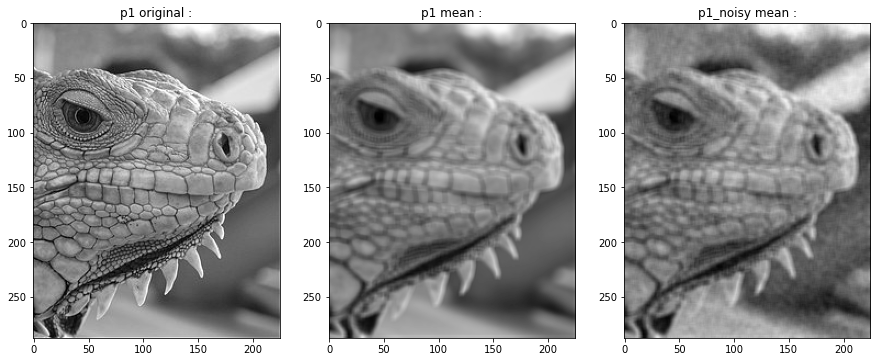

In [9]:
p1_mean = cv2.blur(p1,(5,5))
p1_noisy_mean = cv2.blur(p1_noisy,(5,5))

plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(p1,cmap='gray');
plt.title('p1 original :')

plt.subplot(1,3,2)
plt.imshow(p1_mean,cmap='gray');
plt.title('p1 mean :')

plt.subplot(1,3,3)
plt.imshow(p1_noisy_mean,cmap='gray');
plt.title('p1_noisy mean :');

#### The difference

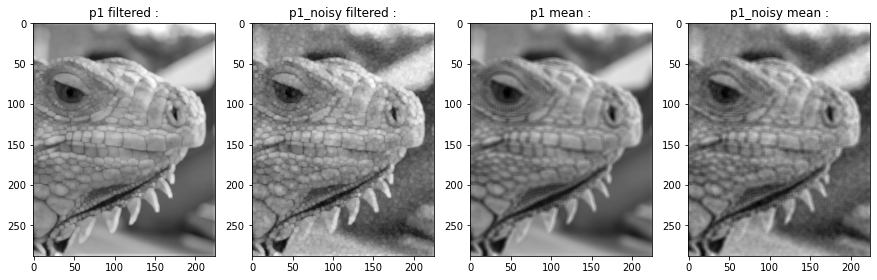

In [14]:
plt.figure(figsize=(15,15))

plt.subplot(141)
plt.imshow(res_p1,cmap='gray');
plt.title('p1 filtered :')

plt.subplot(142)
plt.imshow(res_p1_noisy,cmap='gray');
plt.title('p1_noisy filtered :');

plt.subplot(143)
plt.imshow(p1_mean,cmap='gray');
plt.title('p1 mean :')

plt.subplot(144)
plt.imshow(p1_noisy_mean,cmap='gray');
plt.title('p1_noisy mean :');

<h5>
    Obviously the filter we used ourselves is much better both with the noise and with the bluring, but you have to keep in mide that the normal bluring also acceptable and much faster (like 20 times!).
    
<br>And the reason of it being sharper is that it doesn't fade lines around the image due to selecting the lowst variance compared to averaging blindfully which fades the sudden changes and makes the image blurry.